In [ ]:
library(tidyverse)

In [ ]:
mycobrowser_df <-
read_tsv("/data2/Mtb_genomic_lists/GeneAnnotation/Mycobrowser/Mycobacterium_tuberculosis_H37Rv_txt_v4.txt")

In [ ]:
head(mycobrowser_df)

In [ ]:
mycobrowser_df %>%
    select(Functional_Category) %>%
    unique

In [ ]:
mycobrowser_df %>%
    filter(Functional_Category == "insertion seqs and phages") %>%
    select(Comments) %>%
    head

In [ ]:
mycobrowser_df %>%
    filter(Functional_Category == "insertion seqs and phages") %>%
    mutate(length = Stop - Start) %>%
    select(length) %>%
    sum()


In [ ]:
mycobrowser_df %>%
    select(Stop) %>%
    max

In [ ]:
mycobrowser_df %>%
    filter(Functional_Category == "insertion seqs and phages") %>%
    mutate(length = Stop - Start) %>%
    select(length) %>%
    sum() /
mycobrowser_df %>%
    select(Stop) %>%
    max * 100

## Repetitive elements account for 2.5% of the genome

### The Farhat lab script at https://github.com/farhat-lab/in-host-Mtbc-dynamics/blob/36e27011b5cfaed00521a38652fe2dc853832f25/(B)%20Create%20Gene%20Categories.ipynb also looks for overlaps with antibiotic resistance genes, so let's check for that

## Farhat lab script 

In [ ]:
antibiotic_resistance_genes <- c('Rv0005','Rv0006','Rv0341','Rv0342',
                                 'Rv0343','Rv0667','Rv0668','Rv0682',
                                 'Rv1207','Rv1484','Rv1630','Rv1694',
                                 'Rv1908c','Rv2043c','Rv2245','Rv2428',
                                 'Rv2447c','Rv2754c','Rv2763c','Rv2764c',
                                 'Rv3423c','Rv3608c','Rv3793','Rv3794',
                                 'Rv3795','Rv3806c','Rv3854c','Rv3919c')

In [ ]:
mycobrowser_df %>%
    filter(Functional_Category == "insertion seqs and phages") %>%
    filter(Locus %in% antibiotic_resistance_genes)

# Need to inspect a random gene to see if 0 or 1 indexed and if the start and stop positions inclusive or exclusive

In [ ]:
mycobrowser_df %>%
    filter(Locus == "Rv0262c")

In [ ]:
mycobrowser_df %>%
    select(Start) %>%
    min

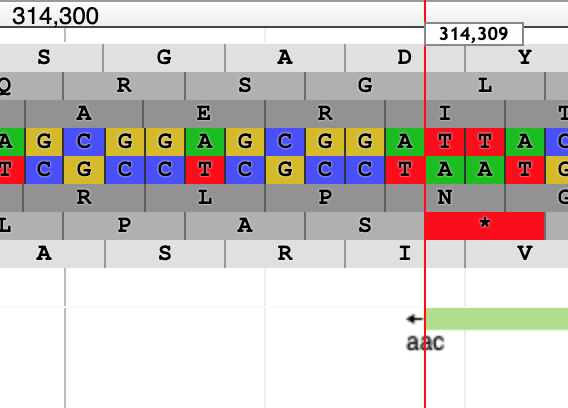

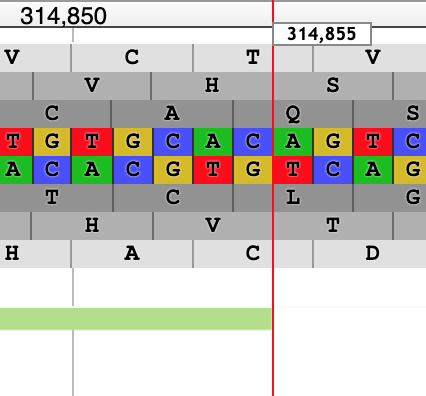

### By manual inspection on the website, start and stop are inclusive, and numbering is 1-indexed, just like a gff file. I checked the mycobrowser gff file for this gene, and the positions are exactly the same

### Need a BED file which is 0-indexed and the start is *inclusive*, but the end is *exclusive* (https://genome.ucsc.edu/FAQ/FAQformat.html#format1) 

In [ ]:
mycobrowser_df %>%
    filter(Functional_Category == "insertion seqs and phages") %>%
    select(Refseq_ID, Start, Stop) %>%
    mutate(Start = Start - 1) %>%
    arrange(Start) %>%
    write_tsv("mycobrowser_v4_repetitive_elements.bed", col_names=FALSE)